<a href="https://colab.research.google.com/github/angelrodriguez0617/CS-4710-Machine-Learning-II/blob/main/A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A5**

We hypothesize that we can use a two layers to classify any two-dimensional partition in a finite region.

The input is (x, y).

The next layer is a large fully connected layer.

The output layer has two neurons using the one-hot strategy.

## Summary of Classification Results

In our classification problem, we used 2 different approaches on challenging spiral data: TensorFlow and Keras.

1. **TensorFlow Model**:
    - The TensorFlow model provided a classification boundary (depicted by the red circle) that separates the yellow (Class 0) and purple (Class 1) data points.
    - Some purple points were misclassified as yellow, leading to inaccuracies.

2. **Keras Model**:
    - The Keras model resulted in distinct classification areas:
        - Yellow region (Class 0): Top left and right edges and bottom left edges.
        - Purple region (Class 1): Larger area, extending from center to bottom right.
    - Misclassifications occurred, with some yellow points falling within the purple region.

Both models have errors, but the errors pertain to different classes. See the results below.

Generated training data:

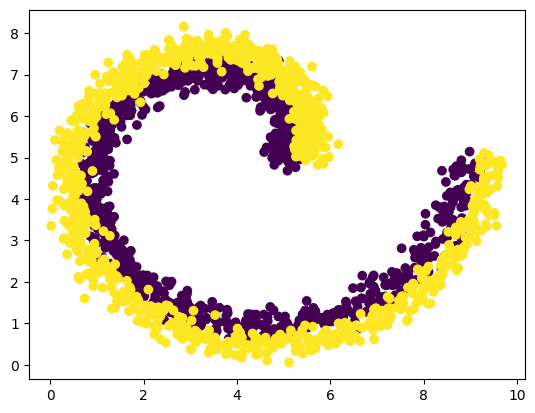


Classification result using TensorFlow:

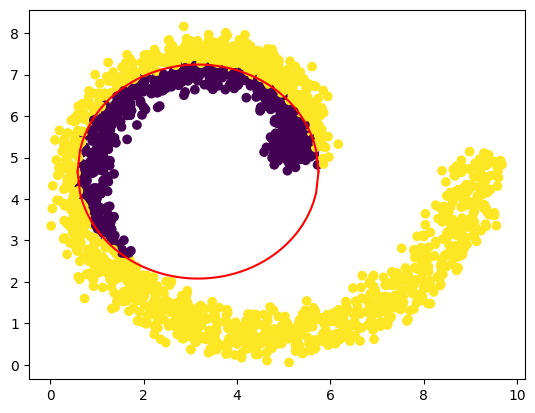

Classification result using Keras:

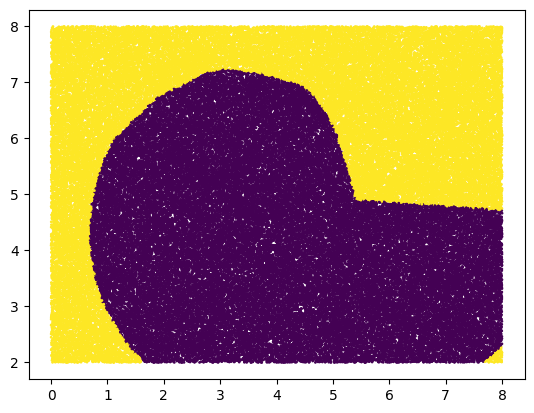


In [1]:
    import tensorflow as tf

    if tf.test.gpu_device_name():

        print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

    else:

       print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

Using device cuda


# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [3]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [5]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.1951547 ]
 [-0.2739674 ]
 [ 0.29834777]], shape=(3, 1), dtype=float32)


In [6]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.36369312]
 [0.4779086 ]
 [0.67293406]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [7]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.7633192 ],
       [ 0.794768  ],
       [-0.28271708]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [10]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [11]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [12]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [15]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

# An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [16]:
import numpy as np
import tensorflow as tf

num_samples_per_class = 1000
num = num_samples_per_class * 2

In [37]:
mu, sigma = 0, 0.2 # mean and standard deviation

# Generate spiral data for Class 0
s0 = np.linspace(0, 2 * np.pi, num_samples_per_class)
r0 = np.linspace(1, 5, num_samples_per_class)  # Increase radius for spiral effect
C0_samples = np.array([r0 * np.cos(s0) + 4, r0 * np.sin(s0) + 5])
C0_samples += np.random.normal(mu, sigma, size=C0_samples.shape)  # Add Gaussian noise
C0_samples = np.transpose(C0_samples)
print(C0_samples.shape)

# Generate spiral data for Class 1 (distinct from Class 0)
s1 = np.linspace(0, 2 * np.pi, num_samples_per_class)
r1 = np.linspace(1.5, 5.5, num_samples_per_class)  # Slightly different radius
C1_samples = np.array([r1 * np.cos(s1) + 4, r1 * np.sin(s1) + 5])
C1_samples += np.random.normal(mu, sigma, size=C1_samples.shape)  # Add Gaussian noise
C1_samples = np.transpose(C1_samples)
print(C1_samples.shape)

# Testing data
T0_samples = np.array([r0 * np.cos(s0) + 4, r0 * np.sin(s0) + 5])
T0_samples += np.random.normal(mu, sigma, size=T0_samples.shape)  # Add Gaussian noise
T0_samples = np.transpose(T0_samples)
print(T0_samples.shape)

T1_samples = np.array([r1 * np.cos(s1) + 4, r0 * np.sin(s1) + 5])
T1_samples += np.random.normal(mu, sigma, size=T1_samples.shape)  # Add Gaussian noise
T1_samples = np.transpose(T1_samples)
print(T1_samples.shape)

(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)


**Stacking the two classes into an array with shape (2000, 2)**

In [38]:
inputs = np.vstack((C0_samples, C1_samples)).astype(np.float32)
Tinputs = np.vstack((T0_samples, T1_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [39]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets = np.reshape(targets,[num,1])
print(inputs.shape, targets.shape)

# Testing targets
Ttargets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
Ttargets = np.reshape(Ttargets,[num,1])
print(Tinputs.shape, Ttargets.shape)


(2000, 2) (2000, 1)
(2000, 2) (2000, 1)


**Plotting the two classes**

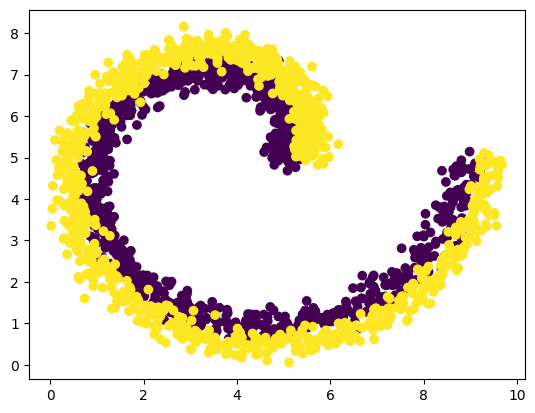

[[4.9151034 5.123538 ]
 [5.0832076 4.6820655]
 [5.01673   5.088567 ]
 ...
 [9.296215  5.108004 ]
 [9.32058   4.8606105]
 [9.3958845 5.0642266]] [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [40]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

print(inputs, targets)

## Method 1: TensorFlow, Ch. 3

**Creating the linear classifier variables**

In [41]:
input_dim = 2
output_dim = 1
#W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))


W = tf.Variable([[4.1], [5.1]])
b = tf.Variable([[2.1]])

print(W, b)
print(W.shape, b.shape)
print(inputs.shape)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1],
       [5.1]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1]], dtype=float32)>
(2, 1) (1, 1)
(2000, 2)


**The forward pass function**

In [42]:
def model(inputs):
    tmp = tf.reshape(tf.square(tf.norm(tf.transpose(W) - inputs, axis=1)), [num,1])
    return tf.math.sigmoid((tmp - b)*10)
    # return (tf.math.sign(tmp - b) + 1 ) / 2
    # return tf.matmul(inputs-np.transpose(W), np.transpose(inputs)-W)

**The mean squared error loss function**

In [24]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [25]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    print(W, b)
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [43]:
for step in range(4000):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Streaming output truncated to the last 5000 lines.
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.1411366],
       [4.8350396]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[6.1139855]], dtype=float32)>
Loss at step 2750: 0.2751
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.1412997],
       [4.8348093]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[6.1149654]], dtype=float32)>
Loss at step 2751: 0.2751
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.1414626],
       [4.8345785]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[6.115945]], dtype=float32)>
Loss at step 2752: 0.2751
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.141625 ],
       [4.8343472]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[6.116924]], dtype=float32)>
Loss at step 

In [44]:
predictions = model(inputs)
# plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0]  )
# plt.show()

print(predictions)
print(predictions.shape)
print(targets.shape)

print('W=',W)
print('b=',b)


tf.Tensor(
[[1.7189371e-15]
 [9.6533031e-14]
 [4.8703822e-14]
 ...
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]], shape=(2000, 1), dtype=float32)
(2000, 1)
(2000, 1)
W= <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.1677232],
       [4.661649 ]], dtype=float32)>
b= <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[6.666386]], dtype=float32)>


<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.1677232],
       [4.661649 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[6.666386]], dtype=float32)>
(100, 1)
(100, 1)


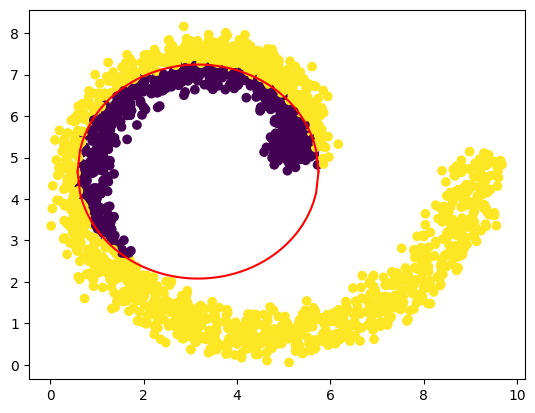

In [45]:
R = np.sqrt(b)
x = np.linspace(W[0]-R, W[0]+R, 100)
y1 = W[1] + np.sqrt(R*R-(x-W[0])*(x-W[0]))
y2 = W[1] - np.sqrt(R*R-(x-W[0])*(x-W[0]))
x = np.reshape(x,[100,1])
y1 = np.reshape(y1,[100,1])
y2 = np.reshape(y2,[100,1])
plt.plot(x, y1, "-r", x, y2, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

print(W,b)
print(x.shape)
print(y1.shape)

## Method 2: Keras, Ch. 2

In [81]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(2, activation="softmax")
])

In [73]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [74]:
model.fit(inputs, targets, epochs=4000, batch_size=2000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 7ms/step - loss: 0.4075 - accuracy: 0.8245
Epoch 1502/4000
1/1 [==============================] - 0s 8ms/step - loss: 0.4075 - accuracy: 0.8110
Epoch 1503/4000
1/1 [==============================] - 0s 9ms/step - loss: 0.4073 - accuracy: 0.8245
Epoch 1504/4000
1/1 [==============================] - 0s 10ms/step - loss: 0.4073 - accuracy: 0.8110
Epoch 1505/4000
1/1 [==============================] - 0s 9ms/step - loss: 0.4071 - accuracy: 0.8245
Epoch 1506/4000
1/1 [==============================] - 0s 10ms/step - loss: 0.4072 - accuracy: 0.8110
Epoch 1507/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.4070 - accuracy: 0.8245
Epoch 1508/4000
1/1 [==============================] - 0s 10ms/step - loss: 0.4070 - accuracy: 0.8115
Epoch 1509/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.4068 - accuracy: 0.8245
Epoch 1510/4000
1/1 [==============================] 

In [75]:
test_digits = Tinputs[0:5]
predictions = model.predict(test_digits)
print(predictions.shape)
predictions[1]

1/1 [==============================] - 0s 52ms/step
(5, 3)


array([7.3554087e-01, 2.6445889e-01, 2.6583177e-07], dtype=float32)

In [76]:
predictions[1].argmax()

0

In [77]:
predictions[1][0]

0.73554087

In [78]:
Ttargets[1]

array([0.], dtype=float32)

In [79]:
test_loss, test_acc = model.evaluate(Tinputs, Ttargets)
print(f"test_acc: {test_acc}")

63/63 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.6940
test_acc: 0.6940000057220459


## Generating the decision map  (Angel 2/18/2024)

(100000, 2)
3125/3125 [==============================] - 4s 1ms/step


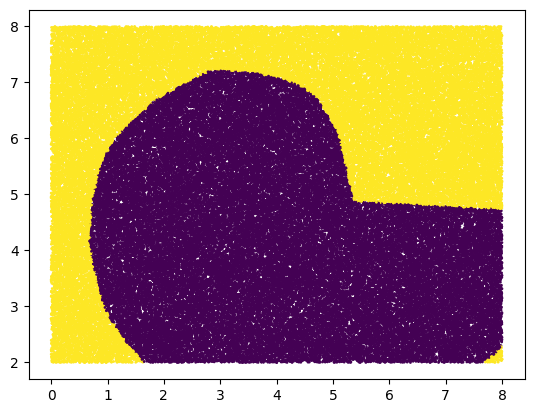

In [80]:
import matplotlib.pyplot as plt

num_samples = 100000

x0 = np.random.uniform(0,8,num_samples)
y0 = np.random.uniform(2,8,num_samples)
FinalInputs = np.vstack((x0, y0)).astype(np.float32)
FinalInputs = np.transpose(FinalInputs)

print(FinalInputs.shape)

predictions = model.predict(FinalInputs)

plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=predictions[:, 1] > 0.5, s=1)
plt.show()

In [57]:
from keras import backend as K

for w in model.trainable_weights:
    print(K.eval(w))

[[-0.01202079 -0.10222079  0.09934904 ... -0.10751148  0.10053995
   0.1550114 ]
 [-0.0615879  -0.12483247  0.00150214 ... -0.09695269 -0.03705019
  -0.18500173]]
[ 0.00000000e+00  5.89578688e-01  2.36744717e-01  2.41312101e-01
  3.09960842e-01 -3.13793153e-01  0.00000000e+00  0.00000000e+00
  5.19923151e-01 -3.43401611e-01  0.00000000e+00  0.00000000e+00
  6.11866593e-01 -3.10693204e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.42838016e-01  2.51145214e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.32447258e-03 -3.11235222e-03 -3.42673898e-01 -2.67618388e-01
  0.00000000e+00 -3.58640343e-01  0.00000000e+00  5.13729900e-02
  0.00000000e+00 -2.65810400e-01  2.13645399e-01  4.64265704e-01
 -3.61714900e-01  2.56073773e-01 -1.97573781e-01 -3.22148681e-01
  2.12096930e-01  5.61163127e-01 -2.74662197e-01 -8.84814262e-02
 -3.22045863e-01 -1.67215481e-01 -9.48829766e-05 -2.81466812e-01
  0.00000000e+00 -3.19130659e-01  0.00000000e+00  7.80783